# #2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

---
---
##<center> Ομάδα: 35 </center>
#####<center>Βαρδάκης Χριστόφορος: el18883</center>
#####<center>Σκουρτσή Δήμητρα Άννα: el18044</center>
---
---

## 1. Θεωρητικό Μέρος

1.
Το Bounding box είναι το παραλληλόγραμμο που περιέχει ένα αντικείμενο ως απάντηση στον αλγόριθμο. Αντίθετα, το anchor box είναι ένα παραλληλόγραμμο που προσεγγίζει το πως θα είναι το bounding box, για παράδειγμα το anchor box της κλάσης των ανθρώπων έχει μεγαλύτερο ύψος από πλάτος, ώστε να μπορούν να εντοπιστούν παραπάνω από ένα αντικείμενα στο ίδιο σημείο.

2.
Οι διαστάσεις του πίνακα εξόδου είναι 16x1
 \begin{align}
    y &= \begin{bmatrix}
           p_{c} \\
           b_{x} \\
           b_{y} \\
           b_{h} \\
           b_{w} \\
           c_{1} \\
           c_{2} \\
           c_{3} \\
           p_{c} \\
           b_{x} \\
           .\\
           .\\
           .\\
           c_{3} \\
         \end{bmatrix}
  \end{align}
Τo  $p_{c}$, ένα για κάθε anchor box, είναι ένας αριθμός ανάμεσα στο 0 και το 1 που δηλώνει αν ανιχνεύτηκε κάτι ή όχι τα $b_{x}$, $b_{y}$, $b_{h}$ και $b_{w}$ δηλώνουν τις συνεταγμένες των δύο bounding box, ένα για κάθε anchor box. Τέλος τα $c_{1}$, $c_{2}$, $c_{3}$ δείχνουν σε ποια κλάση από τις 3 ανήκει το αντικείμενο που ανειχνεύτηκε.

3.
Συχνά ο αλγόριθμος YOLO επιστρέφει πολλά Bounding boxes για το ίδιο αντικείμενο.Η μέθοδος Non-Max Suppression χρησιμοποείται για να εξασφαλιστεί ότι θα προβλεφθεί μόνο ένα bounding box. Όταν έχουν προβλεφθεί ίδια bounding boxes τότε διαλέγει αυτό με το μεγαλύτερο $p_{c}$.

4.
Στον SORT το ταιριασμα γίνεται με την χρήση του Hungarian Algorithm.
Ο αλγόριθμος αυτός χρησιμοποιείτε για να υπολογίσει σε πολυωνυμικό χρόνο το τα βέλτισα ταιριάσματα μεταξύ των ανιχνεύσεων των αντικειμάνων της εικόνας και της πρόβλεψης του motion model. Για να το κάνει αυτό υπολογίζει την ελάχιστη απόσταση μεταξύ των ounding boxes των προβέψεων και των ανιχνεύσεων. Για αυτό χρησιμοποιεί το Intersection over Union, δηλαδή τον λόγο επικάλυψης της τομής προς την ένωση των δύο bounding boxes. Μεαλύτερες τιμές του IoU συνεπάγονται μεγακύτερη επικάλυψη της πρόβλεψης με την ανίχνευση, άρα και μεγαλύτερη πιθανότητα το αντικείμενο που ανιχνεύθηκε να αντιστοιχεί στο αντικείμενο του προηγούμενου frame για το οποίο έγινε η πρόβλεψη.

5.
Tracking by Detection έχουμε όταν οι ανιχνέυσεις των Οbjects δίνονται ως αποτέλεσμα από άλλη μέθοδο (πχ YOLO). Στη περίπτωση αυτή το σύστημα αφού ανιχνέυσει τα αντικείμενα σε κάθε frame, πρέπει να κάνει tracking δεδομένων των ανιχνέυσεων αυτών. Για το tracking χρησιμοποιούνται μοντέλα κίνησης, όπως το  Kalman filter, τα οποία δεν χρησιμοιούν μηχανική μάθηση. Η χρήση deep learning μπορεί συνεπώς να γίνει μόνο στο κομμάτι του object detection και όχι του tracking.




## 2. Εργαστηριακό Μέρος

# Object Detection and Tracking with YOLOv3 and SORT

### Τι σημαίνουν οι όροι localization και detection?

Σε προηγούμενο εργαστήριο είχε γίνει αναφορά στο image classification πρόβλημα όπου ζητούμενο ήταν ταξινόμηση της εικόνας σε μια από τις πιθανές κατηγορίες (labels) εφόσον η εικόνα περιείχε ένα αντικείμενο πχ. αυτοκίνητο. 

Για το classification with localization πρόβλημα θα πρέπει να εντοπίσουμε σε ποιο τμήμα της εικόνας βρίσκεται το αντικείμενο που αναζητούμε. Ο αλγόριθμος σαν εξόδο τώρα εκτός από το label θα βγάλει και τέσσερις συντεταγμένες για το παραλληλόγραμο (bounding box) που περιέχει το αντικείμενο.

Το detection πρόβλημα γενικεύει στην περίπτωση περισσότερων του ενός αντικειμένου.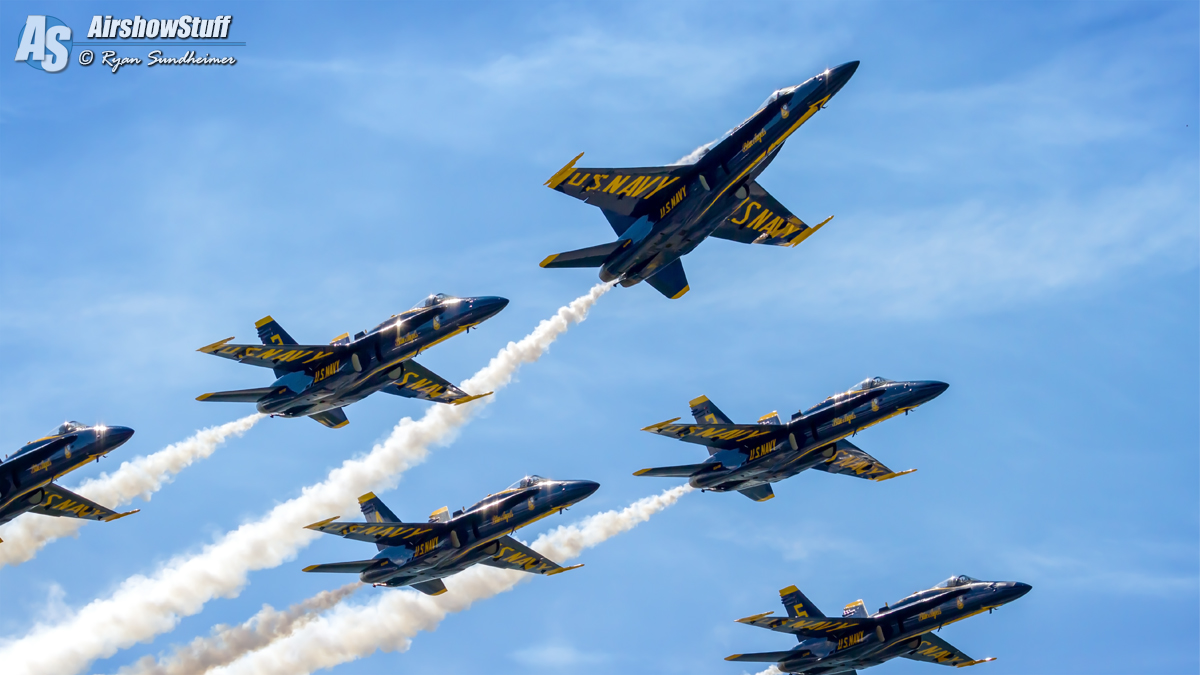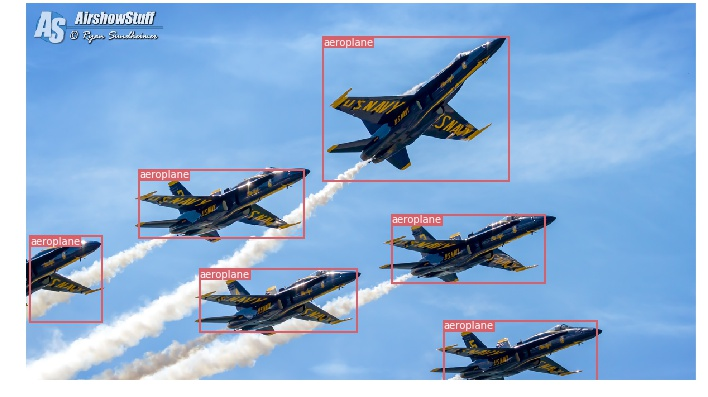


### YOLO Algorithm

Ας υποθέσουμε ότι έχουμε μια εικόνα στην οποία θέλουμε να ανιχνεύσουμε τα αμάξια, τους πεζούς και τις μοτοσυκλέτες (3 κλάσεις) που περιέχει. Ο αλγόριθμος YOLO δημιουργεί ένα πλέγμα (grid) συγκεκριμένων διαστάσεων πχ 3x3 (στο paper είναι 19x19 αλλά εδώ επιλέγουμε μικρότερες διαστάσεις για πιο εύκολη παρουσίαση), και εφαρμόζει τον αλγόριθμο classification with localization σε κάθε ένα από τα τμήματα του πλέγματος (9 φορές στην περιπτωσή μας).


Για το training του αλγορίθομου ορίζουμε τα labels ως εξής:


 \begin{align}
    y &= \begin{bmatrix}
           p_{c} \\
           b_{x} \\
           b_{y} \\
           b_{h} \\
           b_{w} \\
           c_{1} \\
           c_{2} \\
           c_{3} \\
         \end{bmatrix}
  \end{align}
         
πίνακας διαστάσεων 8*1 όπου το $p_{c}$ παίρνει τιμή από 0 έως 1, και είναι ένας δείκτης που ποσοτικοποιεί αν υπάρχει κάτι για ανίχνευση ή όχι, $b_{x}$ $b_{y}$ $b_{h}$ $b_{w}$ είναι οι συντεταγμένες του bounding box και $c_{1}$ $c_{2}$ $c_{3}$ είναι η κλάση στην οποία ανήκει το αντικείμενο. 

Αν το $p_{c}$ είναι κάτω από ένα κατώφλι (το οποίο θέτουμε εμείς πχ.0.6), δηλαδή δεν υπάρχει κάτι προς ανίχνευση τότε οι άλλες 7 τιμές του πίνακα δεν λαμβάνονται υπόψιν. 
Κάθε αντικείμενο στην εικόνα ανηκέι στο τμήμα του πλέγματος στο οποιο βρίσκεται το μέσο σημείο του (βλ. παράδειγμα εικόνας). 







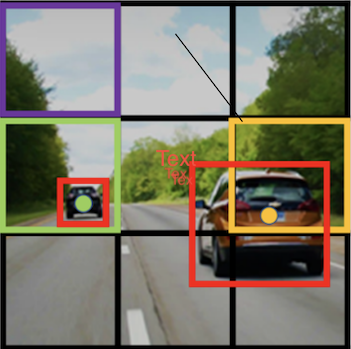

### Intersection over Union (Evaluating Object Detection)

Το bounding box το οποίο έγινε predicted από τον αλγόριθμο YOLO συγkρίνεται με το πραγματικό (ground truth) σύμφωνα με τη μέθοδο Intersection over union (βλ. εικόνα). Σωστή πρόβλεψη συνήθως θεωρείτε αυτή με IoU >= 0.5




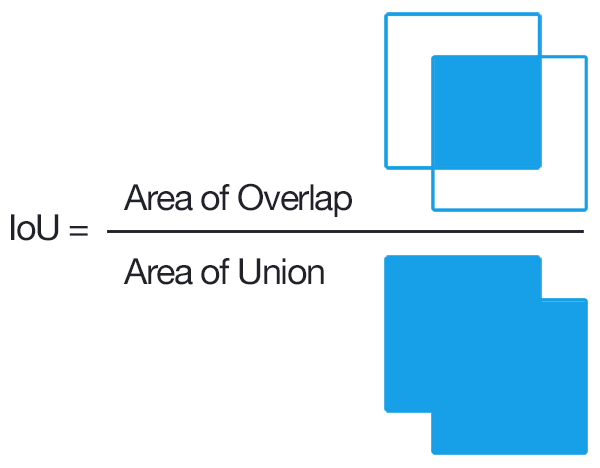

### Non-Max Suppression

Ένα από τα προβλήματα που προκύπτουν κατα την Ανίχνευση Αντικειμένων (Object Detection) είναι ότι μπορεί να γίνει παραπάνω από μια ανίχνευση ενός αντικειμένου, δηλ ο αλγόριθμος να βγάλει σαν έξοδο πολλαπλά bounding boxes για το ίδιο αντικείμενο. Η μέθοδος Non-Max Supression είναι ένας τρόπος για να εξασφαλίστεί ότι η ανίχνευση θα γίνει μόνο μια φορά. 

Υπενθύμιση: Ο αλγόριθμος βγάζει εξόδους της μορφής 
\begin{align}
    y_{h} &= \begin{bmatrix}
           p_{c} \\
           b_{x} \\
           b_{y} \\
           b_{h} \\
           b_{w} \\
           c_{1} \\
           c_{2} \\
           c_{3} \\
         \end{bmatrix}
  \end{align}
- Αρχικά απορρίπτονται όλα τα predictions με $p_{c}$ <= 0.6, δηλ. αυτά που έχουν μικρή πιθανότητα το bounding box να περιέχει κάποιο αντικείμενο.
- Επαναληπτικά (While loop) για τα εναπομείναντα predictions κάνουμε τα εξής: 
    - Διαλέγουμε το bounding box με το μεγαλύτερο $p_{c}$ και το εξάγουμε ως την    πρόβλεψη (prediction)
    - Απορρίπτουμε τα εναπομείναντα bounding boxes με IoU <= 0.5  με το bounding box του προηγούμενου βήματος (prediction).  


### Anchor Boxes

Ένα ακόμα μειονέκτημα του αλγορίθμου Object Detection που έχουμε αναλύσει μέχρι τώρα έιναι ότι κάθε τμήμα του πλέγματος (grid cell) μπορεί να ανιχνεύσει (detect) μόνο ένα αντικείμενο. Όταν θέλουμε ένα κομμάτι του πλέγματος να μππορεί να εντοπίσει παραπάνω από ένα αντικείμενο μπορούμε να χρησιμοποιήσουμε την ιδέα των Anchor Boxes. 

Για τις κλάσεις των αντικειμένων που θέλουμε να εντοπίσουμε δημιουργούμε αντίστοιχο αρθμό anchor boxes τα οποία προσομοιάζουν στο σχήμα των αντίστοιχων κλάσεων. Για παράδειγμα, όταν έχουμε για κλάσεις ανθρώπους και αυτοκίνητα οι άνθρωποι θα έχουν bounding box με μεγάλο υψος και μικρότερο πλάτος ενώ τα αυτοκίνητα θα έχουν μεγαλύτερο πλάτος από υψός. Γι αυτό θέτουμε (βλ. εικόνα) το Ancho Box 1 για την κλάση των ανθρώπων και το Anchor Box 2 για την κλάση των αυτοκινήτων.

Ακολούθως, αλλάζουμε και τον πίνακα της εξόδου του αλγορίθμου $y_{h}$ για να μπορεί να ανιχνεύει πολλαπλά αντικείμενα στο ίδιο grd cell. Τώρα το κάθε $p_{c}$ ανφέρει αν υπάρχει αντικείμενο μιας συγκεκριμένης κλάσης κα όχι απλά αν υπάρχει αντικείμενο. 

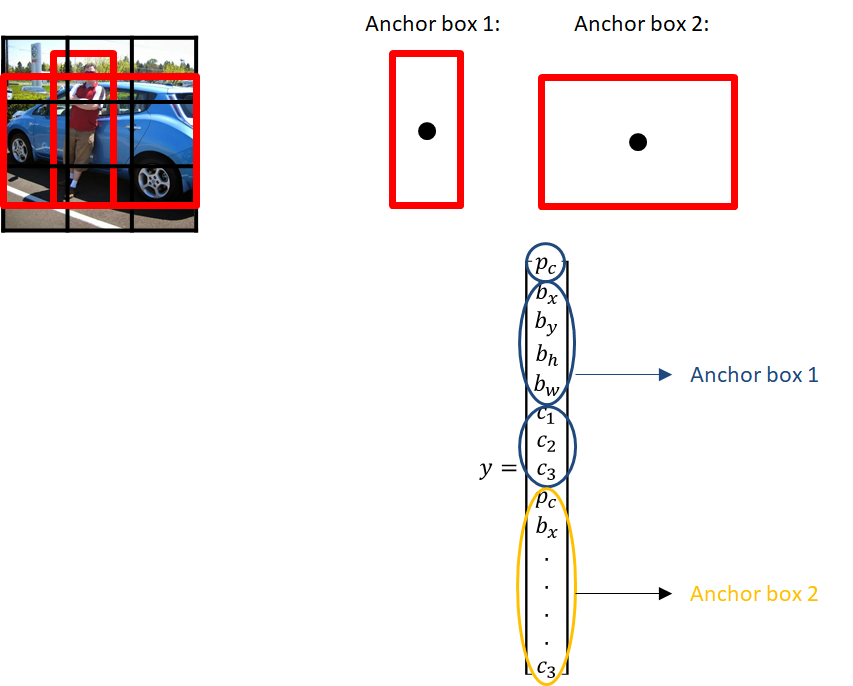

### Model Architecture (Περιληπτική Αναφορά στην Αρχιτεκτονική του Αλγορίθμου YOLOv3)

Ο αλγόριθμος YOLOv3 χρησιμοποιεί μια παραλλαγή του DarkNet μοντέλου, το οποίο περιλαμβάνει 53 επίπεδα νευρώνων, προ-εκπαιδευμένα στο Imagenet dataset. Για το detection πρόβλημα ακόμα 53 επίπεδα νευρώνων έχουν προστεθεί, αθροίζοντας συνολικά σε 106 πλήρως συνελικτικά επίπεδα (fully convolutional architecture). 
Η συγκεκριμένη παραλλαγή του αλγορίθμου YOLO προβλέπει bounding boxes σε τρεις διαφορετικές κλίμακες. Εξάγει πίνακες χαρακτηριστικών (features) σε διαφορετικές κλίμακες (scales) χρησιμοποιώντας ίδια λογική με αυτή του αλγορίθμου των πυραμίδων (feature pyramid networks). Αυτή η μέθοδος εξαγωγής χαρακτηριστικών σε διαφορετικές κλίμακες βελτιώνει κατα πολύ την ανίχνευση μικρών αντικειμένωνν που αποτελούσε μειονέκτημα σε προγενέστερες παραλλαγές του YOLO.

Σαν γενικό συμπέρασμα βλέπουμε πως μια ιδέα όπως τα pyramid networks μπορούν να βελτιώσουν την αρχιτεκτονική state-of-art μοντέλων.

Στο παρακάτω γράφημα φαίνεται η αρχιτεκτόνική του YOLOv3.





image 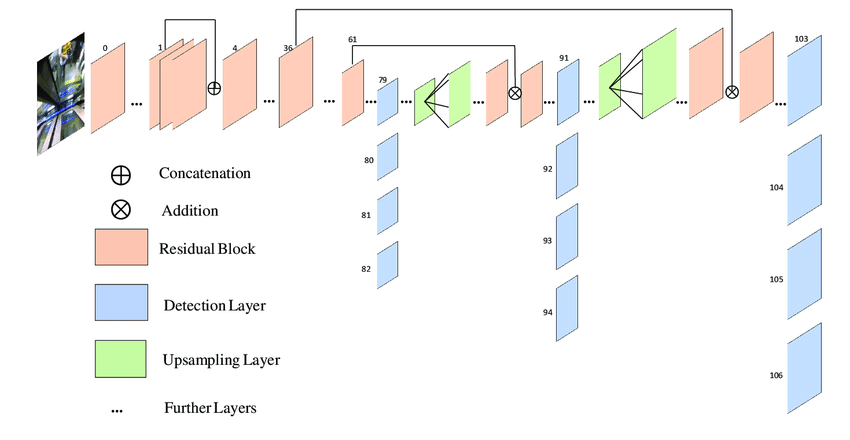from https://www.researchgate.net/figure/Network-architecture-of-YOLOv3_fig1_339763978

##Multiple Object Tracking

Θα εστιάσουμε σε μεθοδολογία tracking-by-detection δηαλδή για αλγορίθμους tracking όπου οι ανιχνεύσεις (detections) δίνονται (στην περίπτωση μας από το αλγόριθμο YOLOv3). Βέβαια, γνωρίζουμε ότι οι ανιχνεύσεις (detections) δεν είναι τέλειες. 
Η ιδέα για το tracking-by-detection είναι η εξής:
- Όταν έχουμε ένα set από detections για έναν αριθμό από ακολουθιακά καρέ  (frames) ενός video, τα οποία έχουν υπολογιστεί ανεξάρτητα μεταξύ τους, τότε το προβλημα tracking (tracking task) ειναι να βρεθούν οι αντιστοιχίες των  detections μεταξύ αυτών των frames και να υπολογιστεί κατ' επέκταση η τροχιά (trajectory).









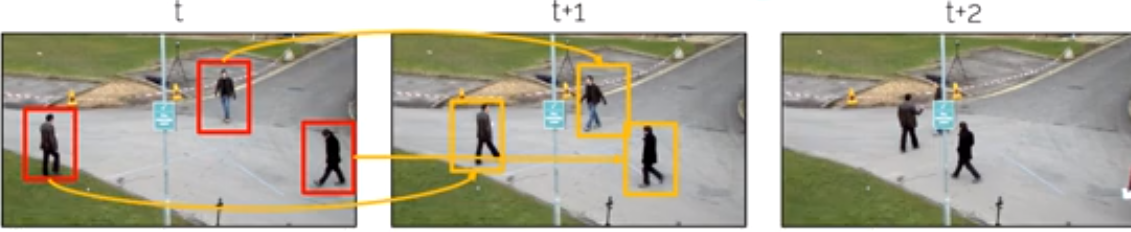

Ορολογία:
- Occlusion: Όταν δύο αντικείμενα έρχονται πολύ κοντά το ένα με το άλλο ή συγχωνεύονται και δεν μπορεί κανείς να τα ξεχωρίσει. 
- Online tracking: Όταν κάνουμε online tracking επεξεργαζόμαστε δυο frames τη φορά. Αυτή η προσέγγιση είναι κατάλληλη για real-time applications, σε αντίθεση με το offline tracking που επεξεργάζεται μεγαλύτερο αριθμο frame και είναι πιο αργή διαδικασία. Το online tracking ειναι πιο δυσκολο να αντιμετωπίσει occlusions σε σχέση με το offline tracking.


Βήματα για Multi-object Tracking χρησιμοποιώντας τον Simple Online and Real-time Tracking (SORT) αλγόριθμο :

 - Αρχικοποίηση του frame t (Track initialization) χρησιμοποιώντας τον detector (YOLOv3 στην περίπτωση μας). Τα αντίκειμενα δηλαδή του frame έχουν εντοπιστεί και έχουν καθοριστεί τα bounding boxes αυτών.

 - Για το frame t+1 αν έχουμε κάνει track για αρκετή ώρα τα συγκεκριμένα αντικείμενα χρησιμοποιούμε το motion model (Kalman filter) για να εξάγουμε τα predictions δηλαδή το πόσο κουνήθηκαν τα bounding boxes σε σχεση με το frame t, υποθέτοντας ότι η κίνηση θα είναι παρόμοια με τις προηγούμενες χρονικές στιγμές (εξισώσεις κίνησης βλ. παρακάτω). Άμα ξεκινήσαμε να το κάνουμε track το αντικείμενο τη χρονική στιγμή t τότε υποθέτουμε ότι τη χρονική στιγμή t+1 δεν κουνήθηκε. 

Εξισώσεις κίνησης για το SORT
\begin{equation} 
  x_{f} = x_{i} + v_{i} + 1/2at^{2} \\
  v_{f} = v_{i} + at
\end{equation}

Για το βήμα 2 ο αλγόριθμος SORT χρησιμοποιεί τη μέθοδο Kalman filter. 

 Kalman filtering ειναι ένας αλγόριθμος που έχει σκοκό να εκτιμήσει την κατάσταση (states) ενός συστήματος δεδομένου ενός μοντέλου και κάποιων μετρήσεων. Στην δική μας περίπτωση οι μετρήσεις έιναι τα detections από το YOLOv3 που γίνονται ανεξάρτητα για κάθε frame του video και το μοντέλο κίνησης από τις εξισώσεις κίνησης (βλ. πανω). 
 
 Η ιδέα για τη χρήση του Kalman filter είναι ότι για τη θέση του bounding box στο frame t+1 (δηλ. κίνηση του αντικειμένου) ο αλγόριθμος δεν μπορεί να βασιστεί μόνο στο detection όυτε μόνο στο motion model αλλά σε ένα βέλτιστο συνδυασμό αυτών. Αξίζει να σημειωθεί ότι θέση και ταχύτητα (state and velocity) μοντελοποιούντε ως συναρτήσεις πυκνότητας πιθανότητας με μέση τιμή και διακύμανση. Άρα το kalman filter βρίσκει το βέλτιστο συνδυασμό αυτών των δύο κατανομών.  
 
 
Οι τροχιές των αντικειμένων διαγράφονται αν τα αντικείμενα δεν έχουν εντοπιστεί από τον detector για Tlost frames.  

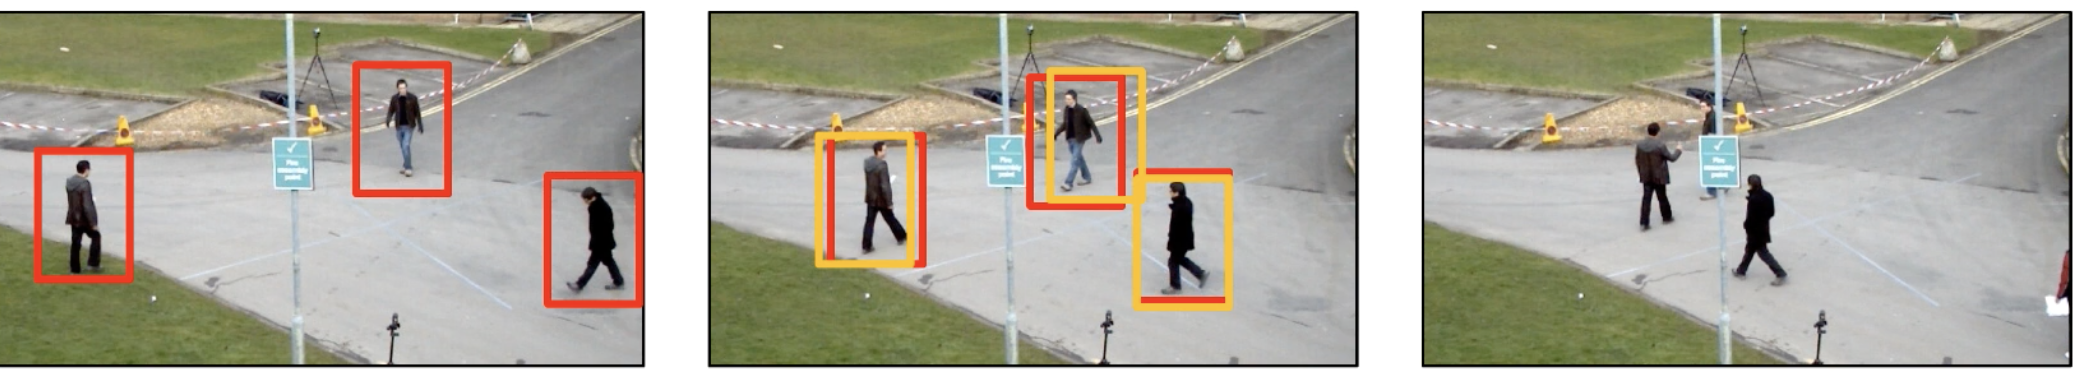

- Ταίριασμα (Matching) των predictions (motion nodel) και των detections που γίνονται εκ νέου για το frame t+1. (Appearnce model)


Για το βήμα 3 όπου γίνονται το matching των διάφορων αντικειμένων της εικόνας χρησιμοποιείτε ο Hungarian algorithm για να υπολογίσει το ελάχιστο κόστος της Intersection over union απόστασης μεταξύ κάθε detection και όλων των predicted bounding boxes. 
Για παράδειγμα, από την παραπάνω εικόνα συγκρίνουμε το IoU του αριστερά κίτρινου bounding box με τα τρία κόκκινα bounding boxes (detections). Είναι προφανές ότι το μεγαλύτερο IoU το έχει με το αριστερό κόκκινο bounding box (τα άλλα δύο IoU είναι 0 αφού η τομή τους με αριστερό κίτρινο prediction είναι 0). 
Στο παρακάτω πινακάκι φαίνεται και σχηματικά η υλοποιήση του Hungarian algorithm στην περίπτωση 4 ανθρώπων για detection. 

To ότι παίρνει την μικρότερη τιμή μην σας μπερδέψει γιατί είναι κοινή πρακτίκη να παίρνουμε το min cost. Σε αυτό το παραδειγμα της φωτογραφίας μάλλον χρησιμοποιήθηκε άλλο bounding box distance ή αντιστράφηκε το IoU για να πάρει τις min τιμές και όχι τις max.

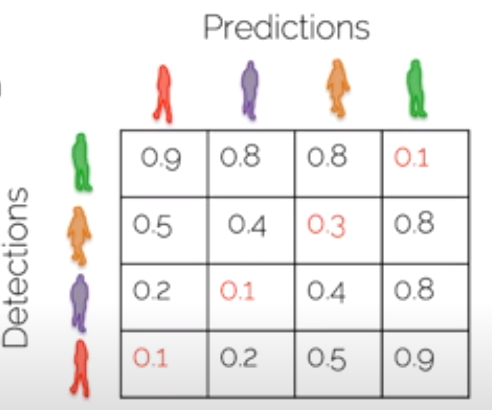

## Βιβλιογραφία


Alex Bewley et al. SIMPLE ONLINE AND REALTIME TRACKING (https://arxiv.org/pdf/1602.00763.pdf]

Joseph Redmon et al. YOLOv3: An Incremental Improvement (https://arxiv.org/pdf/1804.02767.pdf)

Prof. Andrew Ng deeplearningai - Stanford University object detection course (https://www.youtube.com/watch?v=9s_FpMpdYW8&list=PL_IHmaMAvkVxdDOBRg2CbcJBq9SY7ZUvs&index=12&ab_channel=DeepLearningAI)

Prof. Leal-Taixe Technical University of Munich (https://www.youtube.com/watch?v=QtAYgtBnhws&list=PLog3nOPCjKBkamdw8F6Hw_4YbRiDRb2rb&index=6&ab_channel=DynamicVisionandLearningGroup)

Chris Fotache Object detection and tracking with pytorch (https://towardsdatascience.com/object-detection-and-tracking-in-pytorch-b3cf1a696a98)

# Κώδικας


In [ ]:
import sys
!{sys.executable} -m pip install torch==1.5.0 torchvision==0.6.0


In [ ]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pillow
!{sys.executable} -m pip install filterpy==1.4.5
!{sys.executable} -m pip install scikit-image==0.17.2
!{sys.executable} -m pip install lap==0.4.0

Mount to google drive.
Το κάνουμε αυτό για έχουμε πρόσβαση στα python modules που χρειαζόμαστε.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Για να μπορέσετε να έχετε πρόσβαση σε όλα τα αρχεία του φακέλου Lab_motion_tracking_exercise θα πρέπει πριν τρέξετε το παρακάτω κελί να πατε στο drive του εργαστηρίου, να κάνετε δεξί κλικ στο Lab_motion_tracking_exercise, να πατήσετε Add a shortcut to drive και μετά να πατήσετε My Drive.

In [ ]:
import sys
import os 
sys.path.insert(0,'/content/drive/My Drive/Lab_motion_tracking_exercise') 
print(os.listdir('/content/drive/My Drive/Lab_motion_tracking_exercise')) # Έλεγχος ότι έχουμε όλα τα απαραίτητα αρχεία

Φορτώνουμε τις απαραίτητες βιβλιοθήκες

In [ ]:
import numpy as np

from models import *
from utils import *

import os, sys, time, datetime, random
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.autograd import Variable

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image



In [ ]:
import os
print(os.getcwd())

## COCO dataset sample and annotation format

Πηγή: https://cocodataset.org/#explore

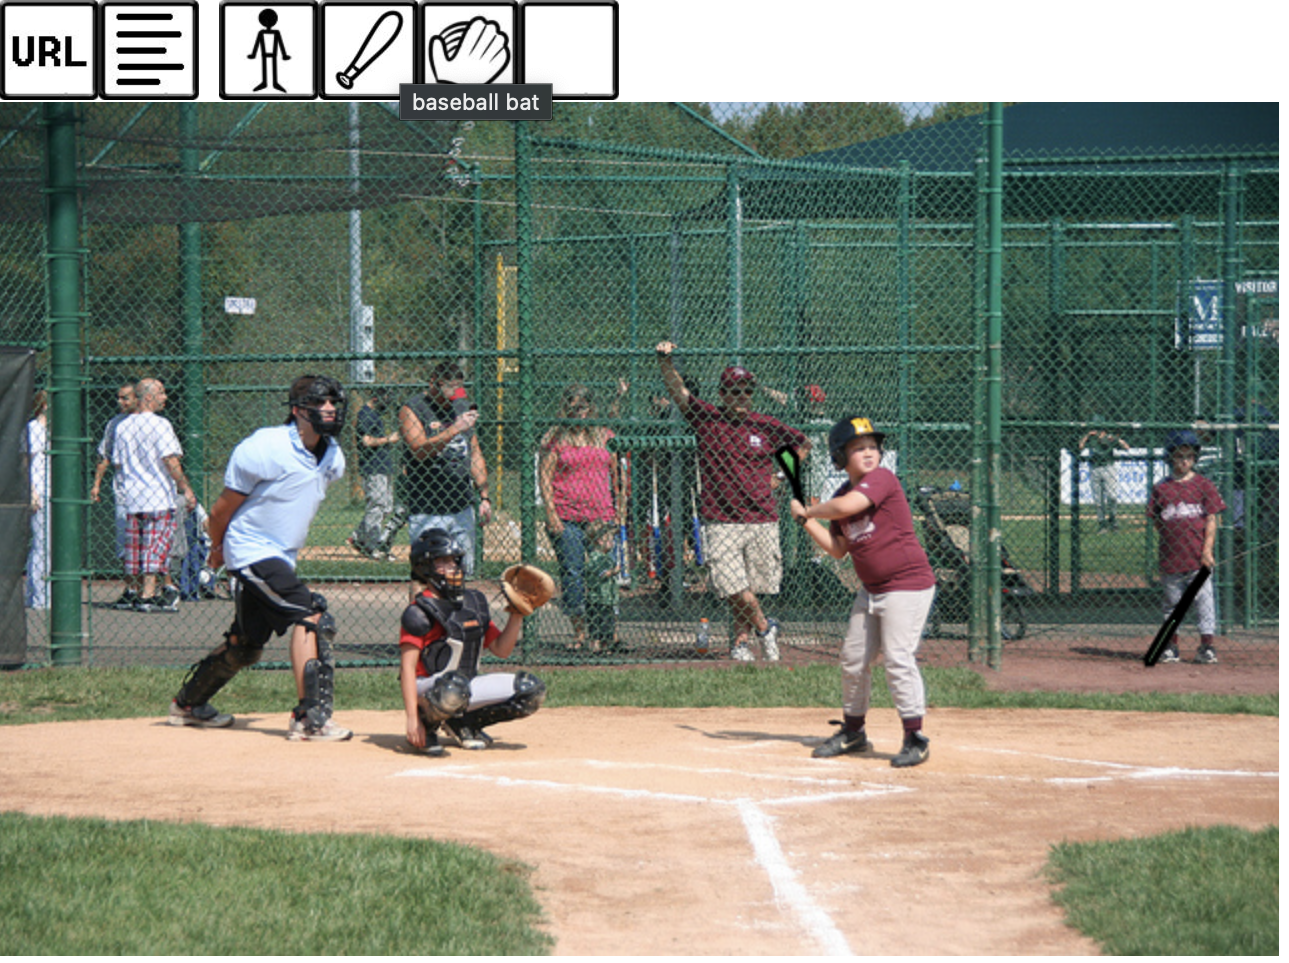

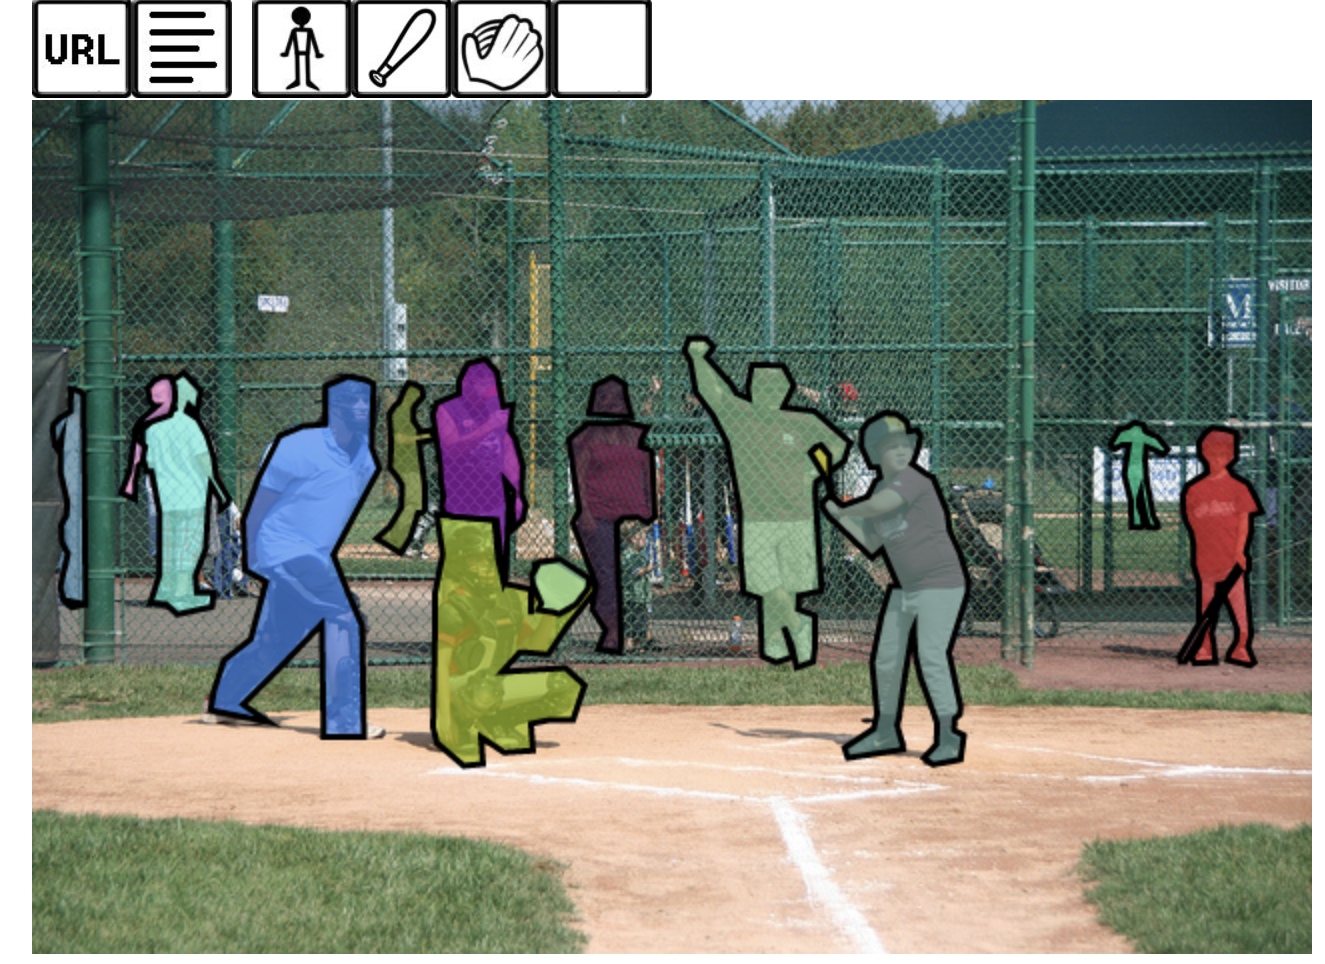

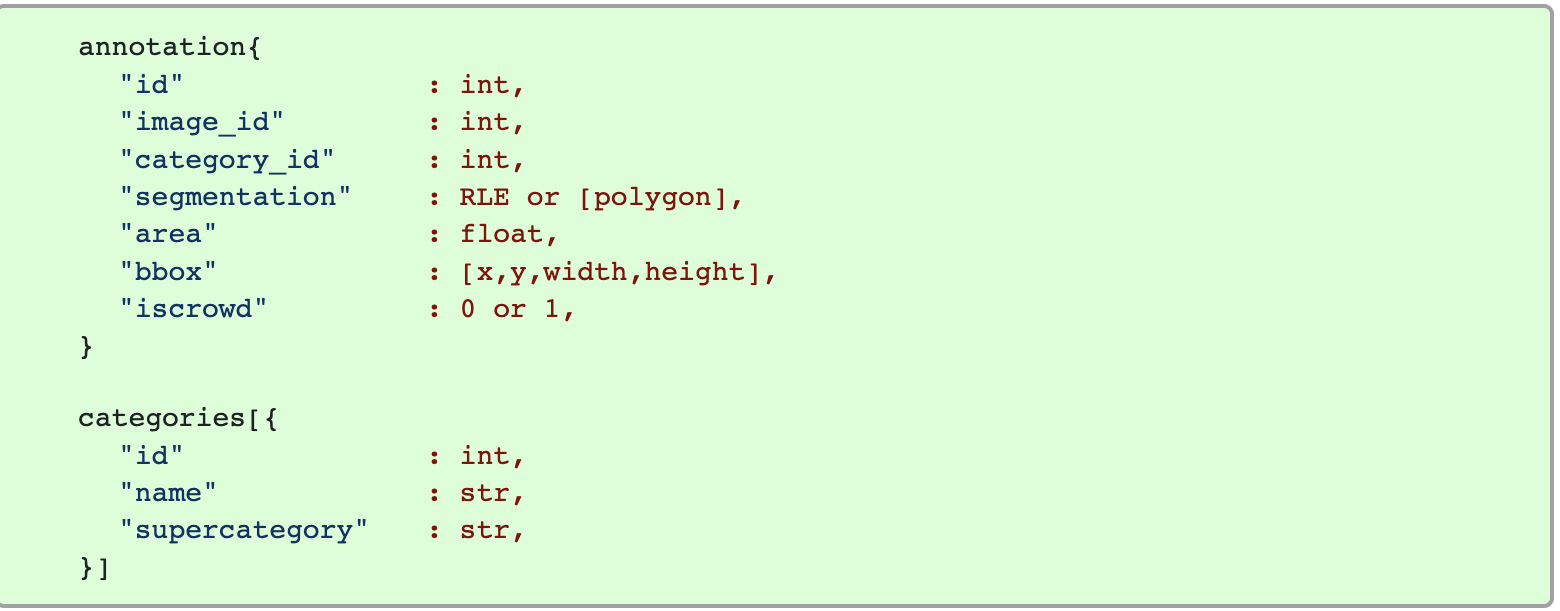

In [ ]:
config_path='./drive/My Drive/Lab_motion_tracking_exercise/config/yolov3.cfg'
weights_path='./drive/My Drive/Lab_motion_tracking_exercise/config/yolov3.weights' # Φορτώνουμε τα προ-εκπαιδευμένα στο COCO dataset βάρη του μοντέλου YOLOv3
class_path='./drive/My Drive/Lab_motion_tracking_exercise/config/coco.names'  #  φορτώνουμε τις μονο τις κλάσεις που θέλουμε να κάνουμε detection (ανθρώπους, αυτοκίνητα κλπ) 
#img_size=416
#conf_thres=0.8
#nms_thres=0.4

img_size=416
conf_thres=0.8
nms_thres=0.4 # NMS threshold


# Load model and weights
model = Darknet(config_path, img_size=img_size)
model.load_weights(weights_path)
model.cuda()
model.eval()
classes = utils.load_classes(class_path)
Tensor = torch.cuda.FloatTensor

In [ ]:
def detect_image(img):
    # scale and pad image
    ratio = min(img_size/img.size[0], img_size/img.size[1])
    imw = round(img.size[0] * ratio)
    imh = round(img.size[1] * ratio)
    img_transforms = transforms.Compose([ transforms.Resize((imh, imw)),
         transforms.Pad((max(int((imh-imw)/2),0), max(int((imw-imh)/2),0), max(int((imh-imw)/2),0), max(int((imw-imh)/2),0)),
                        (128,128,128)),
         transforms.ToTensor(),
         ])
    # convert image to Tensor
    image_tensor = img_transforms(img).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input_img = Variable(image_tensor.type(Tensor))
    # run inference on the model and get detections
    with torch.no_grad():
        detections = model(input_img)
        detections = utils.non_max_suppression(detections, 80, conf_thres, nms_thres)
    return detections[0]

In [ ]:
# load image and get detections
#print(os.getcwd())
img_path = "./drive/My Drive/Lab_motion_tracking_exercise/images/Intersection-Counts.jpg"
prev_time = time.time()
img = Image.open(img_path)
detections = detect_image(img)
inference_time = datetime.timedelta(seconds=time.time() - prev_time)
print ('Inference Time: %s' % (inference_time))

# Get bounding-box colors
cmap = plt.get_cmap('tab20b')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]

img = np.array(img)
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img)

pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
unpad_h = img_size - pad_y
unpad_w = img_size - pad_x

if detections is not None:
    unique_labels = detections[:, -1].cpu().unique()
    n_cls_preds = len(unique_labels)
    bbox_colors = random.sample(colors, n_cls_preds)
    # browse detections and draw bounding boxes
    for x1, y1, x2, y2, conf, cls_conf, cls_pred in detections.cpu():
        box_h = ((y2 - y1) / unpad_h) * img.shape[0]
        box_w = ((x2 - x1) / unpad_w) * img.shape[1]
        y1 = ((y1 - pad_y // 2) / unpad_h) * img.shape[0]
        x1 = ((x1 - pad_x // 2) / unpad_w) * img.shape[1]
        color = bbox_colors[int(np.where(unique_labels == int(cls_pred))[0])]
        bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(bbox)
        plt.text(x1, y1, s=classes[int(cls_pred)], color='white', verticalalignment='top',
                bbox={'color': color, 'pad': 0})
plt.axis('off')
# save image
#plt.savefig(img_path.replace(".jpg", "-det.jpg"), bbox_inches='tight', pad_inches=0.0)
plt.show()

In [ ]:
%pylab inline 
import cv2
from IPython.display import clear_output
from sort import *

def detection():
  videopath = '/content/drive/MyDrive/Lab_motion_tracking_exercise/35.mp4'  # Εδώ θα αλλάξετε το path για να πάρετε το video που αντιστοιχεί στην ομάδα σας
                                                                        # Το video θα πρεπει αρχικά να το έχετε βάλει στο drive σας 
  cmap = plt.get_cmap('tab20b')
  colors = [cmap(i)[:3] for i in np.linspace(0, 1, 20)]

  # initialize Sort object and video capture

  vid = cv2.VideoCapture(videopath)
  mot_tracker = Sort() 
  frames = vid.get(cv2.CAP_PROP_FRAME_COUNT)
  #while(True):
  for ii in range(100):
      ret, frame = vid.read()
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      pilimg = Image.fromarray(frame)
      detections = detect_image(pilimg)

      img = np.array(pilimg)
      pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
      pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
      unpad_h = img_size - pad_y
      unpad_w = img_size - pad_x
      if detections is not None:
          print("ii", ii)
          print(detections.shape)
          tracked_objects = mot_tracker.update(detections.cpu())
          print(tracked_objects.shape)

          unique_labels = detections[:, -1].cpu().unique()
          n_cls_preds = len(unique_labels)
          for x1, y1, x2, y2, obj_id, cls_pred in tracked_objects:
              box_h = int(((y2 - y1) / unpad_h) * img.shape[0])
              box_w = int(((x2 - x1) / unpad_w) * img.shape[1])
              y1 = int(((y1 - pad_y // 2) / unpad_h) * img.shape[0])
              x1 = int(((x1 - pad_x // 2) / unpad_w) * img.shape[1])

              color = colors[int(obj_id) % len(colors)]
              color = [i * 255 for i in color]
              cls = classes[int(cls_pred)]
              cv2.rectangle(frame, (x1, y1), (x1+box_w, y1+box_h), color, 4)
              cv2.rectangle(frame, (x1, y1-35), (x1+len(cls)*19+60, y1), color, -1)
              cv2.putText(frame, cls + "-" + str(int(obj_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 3)

      fig=figure(figsize=(12, 8))
      title("Video Stream")
      imshow(frame)
      show()


      # choose codec according to format needed


      #clear_output(wait=True)

# Περίπτωση 1
Confidence threshold = 0.1 NMS threshold = 0.4

In [ ]:
conf_thres = 0.1
nms_thres = 0.4
detection()

# Περίπτωση 2
Confidence threshold = 0.9 NMS threshold = 0.4

In [ ]:
conf_thres = 0.9
nms_thres = 0.4
detection()

# Περίπτωση 3
Confidence threshold = 0.8 NMS threshold = 0.1

In [ ]:
conf_thres = 0.8
nms_thres = 0.1
detection()

# Περίπτωση 4
Confidence threshold = 0.8 NMS threshold = 0.9

In [ ]:
conf_thres = 0.8
nms_thres = 0.9
detection()

#Σχολιασμός



##Confidence Threshold:
* Όταν είναι χαμηλό, πχ 0.1, εντοπίζονται πολλά αντικειμένα ορισμένα από τα οποία είναι λάθος. Για παράδειγμα φαίνεται ότι έχει αναγνωρίσει ένα άτομο διαμήκους της οθόνης.

* Όταν είναι υψηλό, πχ 0.9, εντπίζονται σωστά αλλά λίγα αντικείμενα/άνθρωποι. Για παράδειγμα το παγκάκι, το οποίο εντοπίζεται με threshold 0.1, δεν εντοπίζεται.

##Non-Max Suppresor Threshold:
Όταν είναι υψηλό, πχ 0.9, το ίδιο αντικείμενο ανιχνεύεται πολλές φορές, ενώ οταν είναι χαμηλό, πχ 0.1, κάθε αντικείμενο ανιχενεύεται μόνο μια φορά.
